In [1]:
#importing required libraries

In [2]:
import cv2
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Flatten, MaxPooling2D, Dropout
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
#Loading data

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


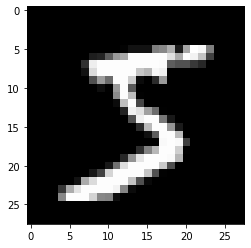

5


In [5]:
plt.imshow(X_train[0], cmap="gray")
plt.show()
print (y_train[0])

In [9]:
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28, 1)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28, 1)
Shape of y_test: (10000,)


In [10]:
# Reshaping so as to convert images for our model
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [11]:
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28, 1)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28, 1)
Shape of y_test: (10000,)


In [12]:
#one hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
model = Sequential()

## Declare the layers
layer_1 = Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1))
layer_2 = MaxPooling2D(pool_size=2)
layer_3 = Conv2D(32, kernel_size=3, activation='relu')
layer_4 = MaxPooling2D(pool_size=2)
layer_5 = Dropout(0.5)
layer_6 = Flatten()
layer_7 = Dense(128, activation="relu")
layer_8 = Dropout(0.5)
layer_9 = Dense(10, activation='softmax')

## Add the layers to the model
model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(layer_4)
model.add(layer_5)
model.add(layer_6)
model.add(layer_7)
model.add(layer_8)
model.add(layer_9)

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2)

Epoch 1/2
1875/1875 [==============================] - 91s 48ms/step - loss: 0.9368 - accuracy: 0.7550 - val_loss: 0.1116 - val_accuracy: 0.9675
Epoch 2/2
1875/1875 [==============================] - 90s 48ms/step - loss: 0.2814 - accuracy: 0.9170 - val_loss: 0.0739 - val_accuracy: 0.9768


1/1 [==============================] - 0s 37ms/step
Prediction (Softmax) from the neural network:

 [[2.1839753e-08 1.3791853e-04 1.2000152e-07 2.8830896e-06 9.9640536e-01
  4.0459051e-07 1.1733357e-08 3.0278889e-03 5.6840122e-06 4.1977040e-04]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


--------- Prediction --------- 




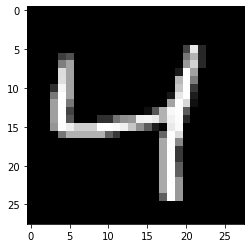



Final Output: 4


In [18]:
example = X_train[2]
prediction = model.predict(example.reshape(1, 28, 28, 1))
print ("Prediction (Softmax) from the neural network:\n\n {}".format(prediction))
hard_maxed_prediction = np.zeros(prediction.shape)
hard_maxed_prediction[0][np.argmax(prediction)] = 1
print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))

print ("\n\n--------- Prediction --------- \n\n")
plt.imshow(example.reshape(28, 28), cmap="gray")
plt.show()
print("\n\nFinal Output: {}".format(np.argmax(prediction)))

In [17]:
metrices=model.evaluate(X_test,y_test,verbose=0)
print("Metrices(test loss and Test Accuracy):")
print(metrices)

Metrices(test loss and Test Accuracy):
[0.07394226640462875, 0.9768000245094299]
